<a href="https://colab.research.google.com/github/GuQiangJS/reading-notes/blob/master/%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%B3%BB%E7%BB%9F%E8%AE%BE%E8%AE%A1/%E7%AC%AC%E4%B8%80%E7%AB%A0_Python%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E5%85%A5%E9%97%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 第1章 Python机器学习入门

本章节主要通过在散点图中根据 指定 `order(多元拟合)` 勾画 `趋势线`讲解了 **过拟合** 和 **欠拟合**。

参考:

* [`np.polyfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(palette="RdBu")

!wget https://raw.githubusercontent.com/XuHLI/BuildML/68226af4970b51bc47624b3afca460cfb8002975/data/web_traffic.tsv

--2019-12-20 08:11:32--  https://raw.githubusercontent.com/XuHLI/BuildML/68226af4970b51bc47624b3afca460cfb8002975/data/web_traffic.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6538 (6.4K) [text/plain]
Saving to: ‘web_traffic.tsv.7’

web_traffic.tsv.7   100%[===================>]   6.38K  --.-KB/s    in 0s      

2019-12-20 08:11:32 (118 MB/s) - ‘web_traffic.tsv.7’ saved [6538/6538]



In [0]:
df=pd.DataFrame(np.genfromtxt('web_traffic.tsv',delimiter='\t'),columns=['hour','value'])

df.head()

,hour,value
0,1.0,2272.0
1,2.0,NaN
2,3.0,1386.0
3,4.0,1365.0
4,5.0,1488.0


In [0]:
df.shape

(743, 2)

#### 预处理和清洗数据

数据包含2列。743行。

按照维度分为两个向量。每隔向量的大小是743。第一个向量x包含小时信息，另一个向量包含某小时内的web访问数。

筛选出y中包含的无效值`nan`。743个项中有8个值缺失了。

In [0]:
df_notna=df[df['value'].notna()]
df.shape,df_notna.shape

((743, 2), (735, 2))

绘制图像

In [0]:
scatter_color=sns.color_palette("RdBu")
line_color=sns.color_palette("RdBu")

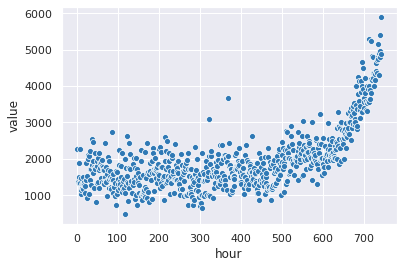

In [0]:
sns.scatterplot(data=df_notna,x='hour',y='value',color=scatter_color[-1])

#### 选择正确的模型和学习算法

首先需要定义方法来计算误差。

> 使用模型预测值到真实值的平方距离来计算误差

In [0]:
def error(f,x,y):
    return np.sum((f(x)-y)**2)

采用 [`plotfit`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) 函数来计算一条最佳拟合线。

`numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)`

* x, y 为已知数据点向量, 分别表示横、纵坐标
* deg 为拟合多项式的次数, 结果返回m次拟合多项式系数, 从高次到低次存放在 **返回** 向量p中。
* 通过将 `full` 设置为 True，可以获得近似误差及更多逼近过程的背景信息。

In [0]:
fp1,residuals,rank,sv,rcond=np.polyfit(df_notna['hour'],df_notna['value'],1,full=True)
print('p=',fp1)
print('近似误差=',residuals)
print(rank)
print(sv)
print(rcond)

np.polyfit(df_notna['hour'],df_notna['value'],1)

p= [  2.59619213 989.02487106]
近似误差= [3.17389767e+08]
2
[1.36699071 0.36240365]
1.63202784619898e-13


array([  2.59619213, 989.02487106])

上面的意思就是，最优的近似直线如下面这个函数所示：

`f(x) = 2.59619213 * x + 989.02487106`

使用 `ploy1d()` 根据参数创建模型函数。

In [0]:
# f1=np.poly1d(fp1)
# print(error(f1,x,y))
# # 一般情况下无需获取近似误差及逼近细节，只需要返回模型参数即可
# print(error(np.poly1d(np.polyfit(x,y,1)),x,y))

趋势线

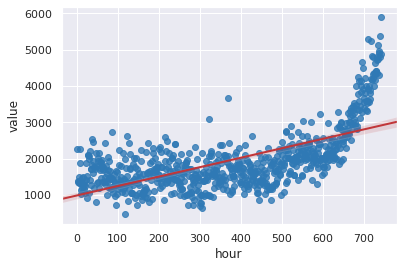

In [0]:
# sns.scatterplot(data=df_notna,x='hour',y='value')
# fx=np.linspace(0,x[-1])#生成x值用来作图
# sns.lineplot(fx,f1(fx),linewidth=1,color='r')

sns.regplot(x="hour", y="value", data=df_notna,scatter_kws={'color':scatter_color[-1]},line_kws={'color': line_color[0],'lw':2})

采用2阶多项式的结果如何呢？

In [0]:
# f2p=np.polyfit(x,y,2)
# print(f2p)
# f2=np.poly1d(f2p)
# print(error(f2,x,y))

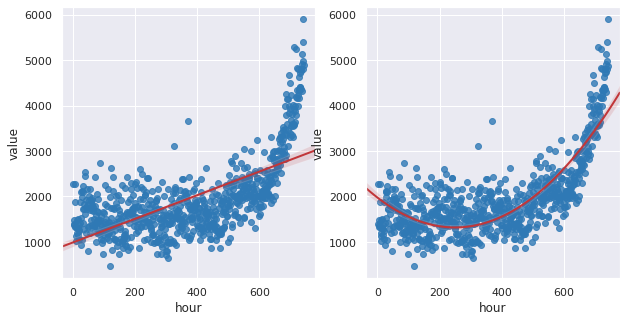

In [0]:
fig,axes=plt.subplots(1,2,figsize=(10, 5))
for i,m,c in zip(range(2),[1,2],sns.color_palette("muted")):
    sns.regplot(x="hour", y="value",ax=axes[i], data=df_notna,scatter_kws={'color':scatter_color[-1]},line_kws={'color': line_color[0],'lw':2},order=m,label='order={0}'.format(m))


更高阶的多项式结果如何呢？

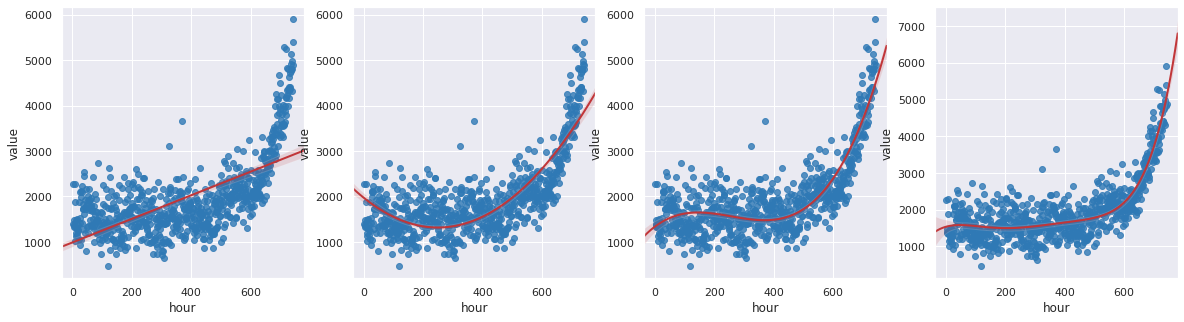

In [0]:
fig,axes=plt.subplots(1,4,figsize=(20, 5))
for i,m,c in zip(range(4),[1,2,3,5,10,50],sns.color_palette("muted")):
    sns.regplot(x="hour", y="value",ax=axes[i], data=df_notna,scatter_kws={'color':scatter_color[-1]},line_kws={'color': line_color[0],'lw':2},order=m,label='order={0}'.format(m))

# plt.ylim(top=df_notna['value'].max(),bottom=df_notna['value'].min())